In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### load datasets

In [4]:
app_train = pd.read_csv('./../../data/home_credit/application_train.csv')

print('application_train shape: ', app_train.shape)
app_train.head()

application_train shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
app_test = pd.read_csv('./../../data/home_credit/application_test.csv')

print('application_test shape: ', app_test.shape)
app_test.head()

application_test shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
columns_description = pd.read_csv('./../../data/home_credit/HomeCredit_columns_description.csv', encoding='latin1')
columns_description.drop(columns_description.columns[0], axis=1, inplace=True)

In [67]:
columns_description.head()

,Table,Row,Description,Special
0,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,application_{train|test}.csv,TARGET,Target variable (1 - client with payment diffi...,NaN
2,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
4,application_{train|test}.csv,FLAG_OWN_CAR,Flag if the client owns a car,NaN


### target variable distribution in the train set

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

Target distribution:
0 - 91.9%
1 - 8.1%


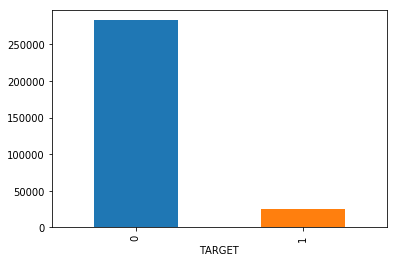

In [105]:
print(columns_description[columns_description['Row'] == 'TARGET']['Description'].iloc[0])
print()
print('Target distribution:')
print('0 - {}%'.format(round(app_train['TARGET'].value_counts(normalize=True)[0] * 100, 1)))
print('1 - {}%'.format(round(app_train['TARGET'].value_counts(normalize=True)[1] * 100, 1)))

app_train['TARGET'].value_counts().plot(kind='bar', label='TARGET')
plt.xlabel('TARGET')
plt.show()

### explore columns

In [68]:
print('data types in app_train datafame:', list(pd.Series(app_train.dtypes).unique()))

data types in app_train datafame: [dtype('int64'), dtype('O'), dtype('float64')]


In [69]:
columns_int64 = app_train.select_dtypes(include='int64').columns
columns_float64 = app_train.select_dtypes(include='float64').columns
columns_object = app_train.select_dtypes(include='object').columns

In [70]:
print('integer columns count:', columns_int64.shape[0])
print('float columns count:', columns_float64.shape[0])
print('object columns count:', columns_object.shape[0])

integer columns count: 41
float columns count: 65
object columns count: 16
